# Rumor Spreading Model

$$I+S \xrightarrow{\lambda} 2S$$

$$S+R \xrightarrow{\alpha} 2R$$

$$S+S \xrightarrow{\alpha} R+S$$

In the ISS model:
Ignorants (I) are individuals who are unaware of the rumor.
Spreaders (S) are individuals who are aware of the rumor and are actively spreading it.
Stiflers (R) are individuals who have either heard the rumor so many times that they are bored of it and stop spreading, or have found out that the rumor is false.

Lets implement a basic model of rumor spreading in a network, which consists of two functions rumor_network and set_seeds.

In [12]:
import numpy as np
import random
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import collections

In [4]:
def rumor_network(G, l, alpha, status):
    """
    Perform a single step of the rumor spreading process.

    Arguments:
    - G: the network
    - l: the rate at which ignorants become spreaders
    - alpha: the rate at which spreaders become stiflers
    - status: a dictionary mapping nodes to their statuses ('I', 'S', or 'R')

    The status dictionary is modified in-place.
    """
    for node in G.nodes():
        if status[node] == 'S':  # if the node is a spreader
            for neighbor in G.neighbors(node):
                if status[neighbor] == 'I' and np.random.uniform(0,1) < l:
                    status[neighbor] = 'S'  # ignorant neighbor becomes a spreader
                elif status[neighbor] in ('S', 'R') and np.random.uniform(0,1) < alpha:
                    status[node] = 'R'  # spreader node becomes a stifler

def set_seeds(status, p):
    """
    Set a fraction p of nodes to be initial spreaders.

    Arguments:
    - status: a dictionary mapping nodes to their statuses ('I', 'S', or 'R')
    - p: the initial fraction of spreaders

    The status dictionary is modified in-place.
    """
    n_of_spreaders = int(p * len(status))  # number of nodes to make spreaders
    initial_spreaders = random.sample(status.keys(), n_of_spreaders)  # choose nodes randomly
    for node in initial_spreaders:
        status[node] = 'S'  # make selected nodes spreaders


**Note**: The uses of random fucntion

- Random functions are used to model the probabilistic nature of interactions between individuals in a network. These functions generate random numbers used to decide the outcomes of certain events.
- np.random.uniform(0,1) < l: This line generates a random number between 0 and 1 and checks if it's less than l. This is essentially a way to simulate an event that happens with a probability of l. If l is 0.5, for example, this condition is expected to be True roughly half of the time, mimicking a coin toss.
- random.sample(status.keys(), n_of_spreaders): This line randomly selects n_of_spreaders nodes from the set of all nodes in the graph without replacement, which means each node can only be selected once.

### Example-1 (Barabasi-Albert (BA) network)

Let's create a BA network and simulate rumor spreading on it, then plot the number of spreaders and stiflers over time.

**In this example**:

- We first create a Barabasi-Albert network with 10000 nodes and 2 edges added for each new node using nx.barabasi_albert_graph.
- We initialize the status dictionary so that all nodes start as ignorants ('I').
- We use the set_seeds function to set 10% of the nodes to be initial spreaders ('S').
- We then perform the rumor spreading process for 100 steps by repeatedly calling the rumor_net function. We use l= 0.1 as the probability of an ignorant becoming a spreader and alpha= 0.1 as the probability of a spreader becoming a stifler.
- After each step, we count the number of each status and store these counts in status_counts_over_time.
- After the simulation, we plot the number of spreaders and stiflers over time. The counts are obtained from status_counts_over_time using Python's get method, which returns a default value (0 in this case) if the status is not found in the dictionary.

In [31]:
# Create a Barabasi-Albert network with 10000 nodes and 2 edges added for each new node
G = nx.barabasi_albert_graph(10000, 2)

# Initialize the status of each node to 'I' (ignorant)
status = {node: 'I' for node in G.nodes()}

# Set 10% of the nodes to be initial spreaders
set_seeds(status, 0.1)

# List to store counts over time
status_counts_over_time = []

# Perform the rumor spreading process for a number of steps (time)
for _ in range(100):
    rumor_network(G, l=0.1, alpha=0.1, status=status)
    status_counts = collections.Counter(status.values())
    status_counts_over_time.append(status_counts)


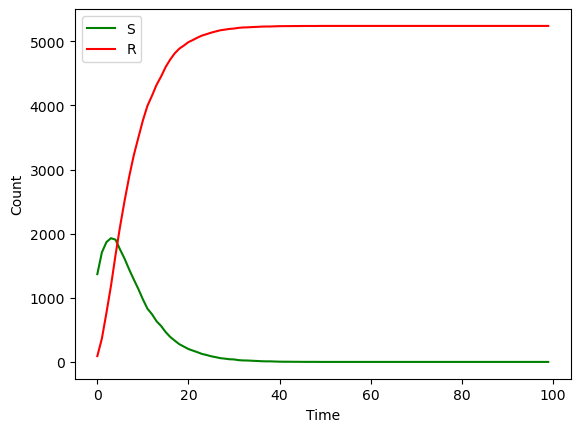

In [32]:
# Now let's plot the number of spreaders and stiflers over time
statuses = ['S', 'R']
colors = ['green', 'red']
for status, color in zip(statuses, colors):
    plt.plot([counts.get(status, 0) for counts in status_counts_over_time], color=color, label=status)

plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

Plot: the number of spreaders and stiflers over time. 

### Example-2 (Karate Club network )

Let's use the classic Karate Club network for this simulation, which is provided in the networkx library. This network represents the social interactions between members of a karate club.

- We first create the Karate Club network using the nx.karate_club_graph function.
- We initialize the status dictionary so that all nodes start as ignorants ('I').
- We use the set_seeds function to set 10% of the nodes to be initial spreaders ('S').
- We then perform the rumor spreading process for 100 steps by repeatedly calling the rumor_net function. We use l=0.3 as the probability of an ignorant becoming a spreader and alpha=0.5 as the probability of a spreader becoming a stifler.


In [23]:
# Create the Karate Club network
G = nx.karate_club_graph()

# Initialize the status of each node to 'I' (ignorant)
status = {node: 'I' for node in G.nodes()}

# Set 10% of the nodes to be initial spreaders
set_seeds(status, 0.3)

# List to store counts over time
status_counts_over_time = []

# Perform the rumor spreading process for a number of steps
for _ in range(100):
    rumor_network(G, l=0.3, alpha=0.5, status=status)
    status_counts = collections.Counter(status.values())
    status_counts_over_time.append(status_counts)


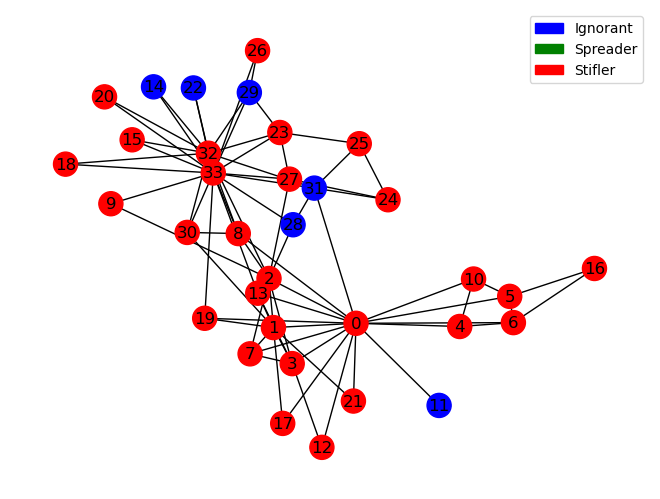

In [24]:
# let's plot the final statuses of the nodes
color_map = {'I': 'blue', 'S': 'green', 'R': 'red'}  # map statuses to colors
node_colors = [color_map[status[node]] for node in G.nodes()]

nx.draw(G, node_color=node_colors, with_labels=True)

# Create legend
ignorant_patch = mpatches.Patch(color='blue', label='Ignorant')
spreader_patch = mpatches.Patch(color='green', label='Spreader')
stifler_patch = mpatches.Patch(color='red', label='Stifler')
plt.legend(handles=[ignorant_patch, spreader_patch, stifler_patch])

plt.show()

***Plot-1***: After the simulation, we plot the network using networkx's built-in drawing function. The color of each node corresponds to its final status: blue for ignorants, green for spreaders, and red for stiflers.

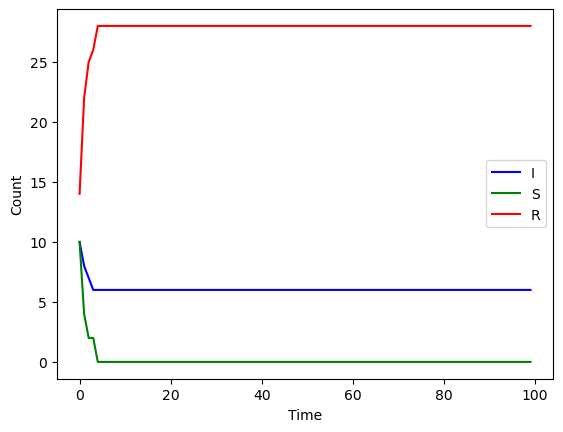

In [25]:
# Now let's plot the statuses over time
statuses = ['I', 'S', 'R']
colors = ['blue', 'green', 'red']
for status, color in zip(statuses, colors):
    plt.plot([counts[status] for counts in status_counts_over_time], color=color, label=status)

plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

***Plot-2***: Plotting the number of ignorants, spreaders, and stiflers over time: This will show how the statuses of nodes change during the simulation.

In [ ]:
# Investigating Role of Topology
